In [1]:
import pandas as pd
import numpy as np
from rdkit.Chem import PandasTools
from matplotlib import pyplot as plt

In [2]:
import matplotlib
matplotlib.use('Agg')

In [4]:
df = pd.read_csv("inspect.csv")

In [5]:
df

,Unnamed: 0,SMILES,gaff-1.81_RMSE,gaff-2.11_RMSE,openff-1.2.0_RMSE,esp_rmse,esp_u,gaff-1.81_u,gaff-2.11_u,openff-1.2.0_u,qm_u
0,847,[H]C1=C(N2N(C(=NON2N=N1)[H])[H])[H],33.76996994018555,32.618454,39.344650,2.260559,"[0.04852581024169922, 0.04503917694091797, 0.0...","[-0.022068798542022705, -0.028297409415245056,...","[-0.016591861844062805, -0.027158662676811218,...","[-0.038210369646549225, -0.04200838506221771, ...","[0.0498046875, 0.04547119140625, 0.04284667968..."
1,126,[H]C1=C(N2N(N=C(N(N2N=N1)[H])[H])[H])[H],37.663726806640625,39.800968,38.786415,3.306545,"[0.05943012237548828, 0.05275917053222656, 0.0...","[-0.037636056542396545, -0.030312441289424896,...","[-0.0548388734459877, -0.028660684823989868, -...","[-0.04590112343430519, -0.035090330988168716, ...","[0.06591796875, 0.04827880859375, 0.0393066406..."
2,329,[H]C1=C(ON2C(=C(OC(=O)N2N1[H])[H])[H])[H],23.514856338500977,20.200439,34.036812,1.703065,"[0.0455322265625, 0.0492401123046875, 0.039505...","[-0.004937082529067993, 0.01052052527666092, -...","[-0.0030295997858047485, 0.022533699870109558,...","[-0.035481225699186325, -0.021787747740745544,...","[0.05438232421875, 0.0460205078125, 0.04296875..."
3,318,[H]C1=C(N(N2N=NOC(=O)N2N1[H])[H])[H],29.60373306274414,32.178070,31.090771,3.178887,"[0.041512489318847656, 0.030249595642089844, 0...","[-0.02436015009880066, -0.03970088064670563, -...","[-0.024576567113399506, -0.03775346279144287, ...","[-0.0412164181470871, -0.030295953154563904, -...","[0.0484619140625, 0.023193359375, 0.0252685546..."
4,310,[H]C1=C(SN2N(O1)C(=NS2)[H])[H],11.329859733581543,11.113308,29.853775,1.954079,"[0.0515599250793457, 0.043511390686035156, 0.0...","[0.022707775235176086, 0.02126041054725647, 0....","[0.023560091853141785, 0.02169586718082428, 0....","[-0.03398968279361725, -0.028750307857990265, ...","[0.052978515625, 0.0426025390625, 0.0422363281..."
...,...,...,...,...,...,...,...,...,...,...,...
1663,566,[H]C1=C2C(=C(C(=O)C1=O)[H])OC(=C(O2)[H])[H],0.8788694143295288,0.835991,0.261283,0.481162,"[0.004302024841308594, -0.0007152557373046875,...","[0.005298402160406113, -0.002292405813932419, ...","[0.005113441497087479, -0.0022305771708488464,...","[0.0024603232741355896, -0.00112200528383255, ...","[0.0025634765625, -0.0003662109375, -0.0004272..."
1664,918,[H]C1=NON=C1[H],0.6673991680145264,0.634196,0.260495,0.592108,"[-0.00013589859008789062, -0.00059938430786132...","[-0.0004442519857548177, -0.000453323766123503...","[-0.0003309407038614154, -0.000437224167399108...","[0.0009110718965530396, 4.6819448471069336e-05...","[0.0018310546875, -0.000244140625, -0.00036621..."
1665,1372,[H]C1=C(N(C(=N1)[H])[H])[H],0.12093667685985565,0.105645,0.165598,0.147148,"[0.0005002021789550781, -0.0002217292785644531...","[0.00015005748718976974, -0.000121560180559754...","[0.00010644807480275631, -2.958974801003933e-0...","[0.0004566982388496399, -0.0003170967102050781...","[0.000213623046875, 0.0003204345703125, -0.000..."
1666,706,[H]c1c2c(nc(n1)[H])SC(=C2[H])[H],0.31645289063453674,0.369065,0.122350,0.474475,"[0.0057220458984375, 0.0005426406860351562, -0...","[0.0033689141273498535, -0.0001085847616195678...","[0.0029413774609565735, -9.049475193023682e-05...","[0.0031031593680381775, 0.0006606485694646835,...","[0.00360107421875, 0.0008544921875, 6.10351562..."


In [6]:
PandasTools.AddMoleculeColumnToFrame(df, "SMILES", "mol")

RDKit ERROR: [18:22:49] SMILES Parse Error: syntax error while parsing: -0.00079345703125
RDKit ERROR: [18:22:49] SMILES Parse Error: Failed parsing SMILES ' -0.00079345703125' for input: ' -0.00079345703125'


In [21]:
def plot(row):
    fig = plt.figure()
    plt.plot(627.5 * np.array(eval(row['openff-1.2.0_u'])), '-o', label="OFF")
    plt.plot(627.5 * np.array(eval(row['qm_u'])), '-o', label="QM")
    plt.plot(627.5 * np.array(eval(row['esp_u'])), '-o', label="espaloma")
    plt.legend()
    plt.xlabel("iter")
    plt.ylabel("$U$ kcal/mol")
    import io
    import base64
    img = io.BytesIO()
    fig.savefig(img, format="png", dpi=50)
    img.seek(0)
    img = base64.b64encode(img.read()).decode("utf-8")
    img = "<img src='data:image/png;base64, %s'/>" % img
    return img

In [22]:
df = df.dropna(axis=0)

In [23]:
df['img'] = df.apply(plot, axis=1)

In [24]:
df.to_html(columns=["SMILES", "gaff-1.81_RMSE", "gaff-2.11_RMSE", "openff-1.2.0_RMSE", "esp_rmse", "mol", "img"], buf="inspect.html", escape=False)

,Unnamed: 0,SMILES,gaff-1.81_RMSE,gaff-2.11_RMSE,openff-1.2.0_RMSE,esp_rmse,esp_u,gaff-1.81_u,gaff-2.11_u,openff-1.2.0_u,qm_u,mol
0,847,[H]C1=C(N2N(C(=NON2N=N1)[H])[H])[H],33.76996994018555,32.618454,39.344650,2.260559,"[0.04852581024169922, 0.04503917694091797, 0.0...","[-0.022068798542022705, -0.028297409415245056,...","[-0.016591861844062805, -0.027158662676811218,...","[-0.038210369646549225, -0.04200838506221771, ...","[0.0498046875, 0.04547119140625, 0.04284667968...",
1,126,[H]C1=C(N2N(N=C(N(N2N=N1)[H])[H])[H])[H],37.663726806640625,39.800968,38.786415,3.306545,"[0.05943012237548828, 0.05275917053222656, 0.0...","[-0.037636056542396545, -0.030312441289424896,...","[-0.0548388734459877, -0.028660684823989868, -...","[-0.04590112343430519, -0.035090330988168716, ...","[0.06591796875, 0.04827880859375, 0.0393066406...",
2,329,[H]C1=C(ON2C(=C(OC(=O)N2N1[H])[H])[H])[H],23.514856338500977,20.200439,34.036812,1.703065,"[0.0455322265625, 0.0492401123046875, 0.039505...","[-0.004937082529067993, 0.01052052527666092, -...","[-0.0030295997858047485, 0.022533699870109558,...","[-0.035481225699186325, -0.021787747740745544,...","[0.05438232421875, 0.0460205078125, 0.04296875...",
3,318,[H]C1=C(N(N2N=NOC(=O)N2N1[H])[H])[H],29.60373306274414,32.178070,31.090771,3.178887,"[0.041512489318847656, 0.030249595642089844, 0...","[-0.02436015009880066, -0.03970088064670563, -...","[-0.024576567113399506, -0.03775346279144287, ...","[-0.0412164181470871, -0.030295953154563904, -...","[0.0484619140625, 0.023193359375, 0.0252685546...",
4,310,[H]C1=C(SN2N(O1)C(=NS2)[H])[H],11.329859733581543,11.113308,29.853775,1.954079,"[0.0515599250793457, 0.043511390686035156, 0.0...","[0.022707775235176086, 0.02126041054725647, 0....","[0.023560091853141785, 0.02169586718082428, 0....","[-0.03398968279361725, -0.028750307857990265, ...","[0.052978515625, 0.0426025390625, 0.0422363281...",
...,...,...,...,...,...,...,...,...,...,...,...,...
1663,566,[H]C1=C2C(=C(C(=O)C1=O)[H])OC(=C(O2)[H])[H],0.8788694143295288,0.835991,0.261283,0.481162,"[0.004302024841308594, -0.0007152557373046875,...","[0.005298402160406113, -0.002292405813932419, ...","[0.005113441497087479, -0.0022305771708488464,...","[0.0024603232741355896, -0.00112200528383255, ...","[0.0025634765625, -0.0003662109375, -0.0004272...",
1664,918,[H]C1=NON=C1[H],0.6673991680145264,0.634196,0.260495,0.592108,"[-0.00013589859008789062, -0.00059938430786132...","[-0.0004442519857548177, -0.000453323766123503...","[-0.0003309407038614154, -0.000437224167399108...","[0.0009110718965530396, 4.6819448471069336e-05...","[0.0018310546875, -0.000244140625, -0.00036621...",
1665,1372,[H]C1=C(N(C(=N1)[H])[H])[H],0.12093667685985565,0.105645,0.165598,0.147148,"[0.0005002021789550781, -0.0002217292785644531...","[0.00015005748718976974, -0.000121560180559754...","[0.00010644807480275631, -2.958974801003933e-0...","[0.0004566982388496399, -0.0003170967102050781...","[0.000213623046875, 0.0003204345703125, -0.000...",
1666,706,[H]c1c2c(nc(n1)[H])SC(=C2[H])[H],0.31645289063453674,0.369065,0.122350,0.474475,"[0.0057220458984375, 0.0005426406860351562, -0...","[0.0033689141273498535, -0.0001085847616195678...","[0.0029413774609565735, -9.049475193023682e-05...","[0.0031031593680381775, 0.0006606485694646835,...","[0.00360107421875, 0.0008544921875, 6.10351562...",

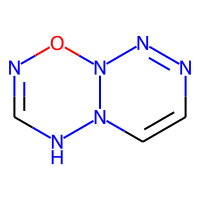
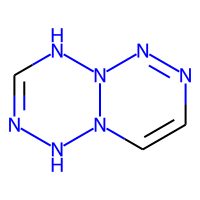
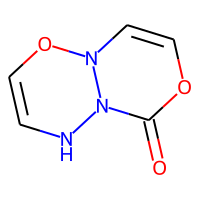
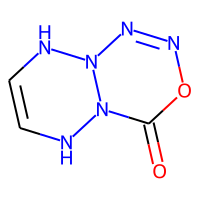
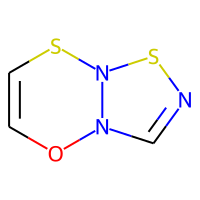
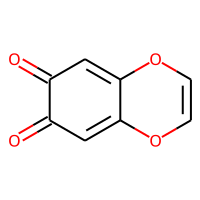
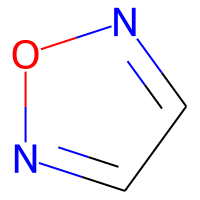
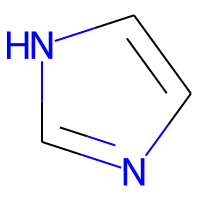
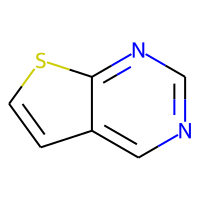

In [13]:
df